<font size=7 color ="#5499C7" >AI CA3 - Clustering</font>
- <font size=5>__Name__ : Kourosh Sajjadi</font>
- <font size=5>__UID__  : 810100587</font>

<p align="justify"><font size="5" color="#A9CCE3"><b>Section 0: Basic Concepts and Problem Goals</b></font><br></p>

<p align="justify">
In this project, we explore the use of clustering algorithms to analyze and categorize images of various flowers. Our objective is to group these images into distinct clusters based on the available data. By applying clustering algorithms, we aim to achieve high accuracy in placing each image into its appropriate cluster, thereby facilitating a deeper understanding of the intrinsic patterns within the dataset.
</p>


### <p align="justify"><font size="5" color="#A9CCE3"><b>Section 1: Preprocessing and Feature Extraction</b></font></p>

#### <p align="justify"><font size="5" color="#d62b5b">1. What is the reason for feature extraction? Why don't we just read the pixels? Please explain.</font></p>
<p align="justify">
<b>Feature extraction</b> is a fundamental process in image processing and machine learning. It transforms raw data (pixels) into a more informative and compressed representation, emphasizing essential image features while disregarding irrelevant noise. Here are some crucial reasons why feature extraction is preferred over direct use of raw pixel values:
</p>

- <b>Dimensionality Reduction:</b> Raw images can consist of thousands to millions of pixels, resulting in high-dimensional data. Processing such vast amounts of data is computationally intensive and susceptible to overfitting, known as the "curse of dimensionality". Feature extraction reduces the data dimensions, focusing only on the most informative aspects for analysis.
- <b>Invariance:</b> Effective features are often designed to be invariant to changes that do not alter the semantic content of the image, such as minor shifts, rotations, and lighting variations. This invariance enables the development of robust models that maintain performance across different conditions.
- <b>Enhanced Interpretation:</b> Focusing on critical features rather than raw pixels allows models to better identify and leverage underlying patterns in the data, such as edges, textures, and shapes, which are more informative for tasks like object recognition than mere pixel intensities.

#### <p align="justify"><font size="5" color="#d62b5b">2. Research feature extraction from images and briefly explain three techniques involved.</font></p>
<p align="justify">
Feature extraction techniques play a pivotal role in interpreting the content within images. Here are three widely-used methods:
</p>

- <b>Edge Detection (Sobel, Canny, etc.):</b> Edge detection algorithms pinpoint areas in an image where brightness significantly changes. These algorithms, including Sobel, Prewitt, and Canny, delineate these points as edges, capturing object boundaries and contours essential for shape recognition.
- <b>Histogram of Oriented Gradients (HOG):</b> This technique counts occurrences of gradient orientations in specific image segments. It is particularly valuable for object detection in computer vision, effectively capturing object structures irrespective of exact pixel values.
- <b>Scale-Invariant Feature Transform (SIFT):</b> SIFT identifies unique invariant features from images that facilitate reliable matching across different views of an object or scene. These features are robust to variations in image scale, rotation, and even changes in illumination and 3D camera viewpoint, supporting a broad range of affine distortions and noise.

#### <p align="justify"><font size="5" color="#d62b5b">3. What preprocessing should be done on the images before they are ready to be input into the model?</font></p>
<p align="justify">
Proper preprocessing is essential before inputting images into a neural network model like VGG16:
</p>

- <b>Resizing:</b> Ensure all images are resized to match the input requirements of the model, such as 224x224 pixels for VGG16.
- <b>Normalization/Standardization:</b> Adjust the pixel values to a range that the model is accustomed to. For models trained on ImageNet, like VGG16, this typically involves subtracting mean RGB values and dividing by the standard deviation. Such normalization not only speeds up training but also aids in faster convergence.
- <b>Format Conversion:</b> Convert images from their original format (JPEG, PNG, etc.) into a 3D array format that the model expects, ensuring proper channel representation and data structure.


In [47]:
import numpy as np
import os
import cv2
import random
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
import certifi
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, homogeneity_score
import pandas as pd
import seaborn as sns

os.environ['SSL_CERT_FILE'] = certifi.where()

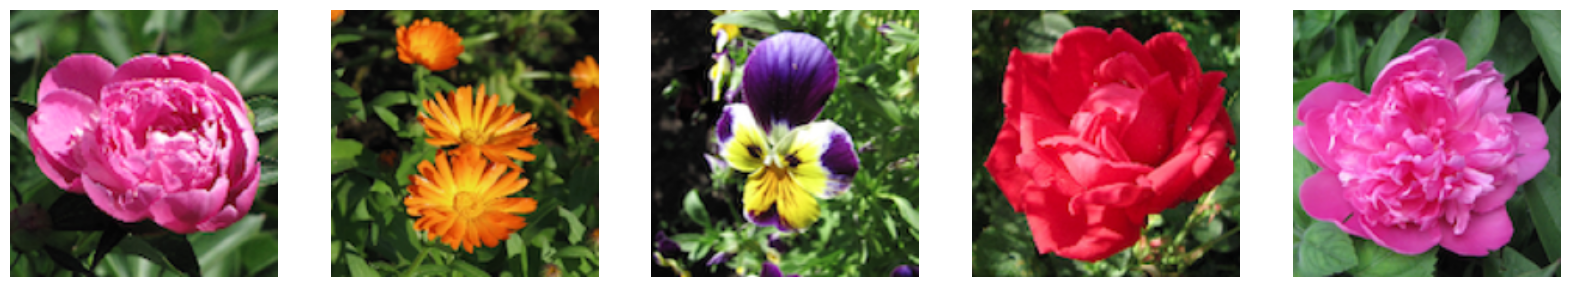

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━

In [58]:
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

image_dir = 'flower_images'

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

def extract_features(directory):
    features = []
    image_paths = []
    for img_name in sorted(os.listdir(directory)):
        if img_name.endswith('.png'):
            img_path = os.path.join(directory, img_name)
            img_processed = load_and_preprocess_image(img_path)
            feature = model.predict(img_processed)
            features.append(feature.flatten())
            image_paths.append(img_name)
    return features, image_paths

def read_images(folder_path, target_size = (224, 224)):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".png"):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img_resized = cv2.resize(img, target_size)
                # img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
                # img_preprocessed = preprocess_input(img_rgb)
                # img_normalized = (img_preprocessed / 255.0 - normalise_means) / normalise_std
                images.append(img_resized)

    return np.array(images, dtype = np.float32)

def display_random_images(images, num_images_to_plot = 5):
    fig, axes = plt.subplots(1, num_images_to_plot, figsize=(20, 10))
    for i in range(num_images_to_plot):
        img = random.choice(images)
        img = img.astype(np.float32) / 255.0
        axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[i].axis('off')
    plt.show()

flower_images = read_images(image_dir)
display_random_images(flower_images)

features, image_names = extract_features(image_dir)
print("Feature extraction complete.")

In [49]:
# def preprocess_image(image):
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     blurred = cv2.GaussianBlur(gray, (5, 5), 0)
#     _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#     kernel = np.ones((5, 5), np.uint8)
#     opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
#     sure_bg = cv2.dilate(opening, kernel, iterations=3)
#     sure_fg = cv2.erode(sure_bg, kernel, iterations=3)
#     unknown = cv2.subtract(sure_bg, sure_fg)

#     _, markers = cv2.connectedComponents(sure_fg)
#     markers += 1
#     markers[unknown == 255] = 0
    
#     markers = cv2.watershed(image, markers)
#     image[markers == -1] = [255, 0, 0] 
    
#     return image

# def read_images(folder_path, target_size=(224, 224)):
#     images = []

#     for filename in os.listdir(folder_path):
#         if filename.endswith(".png"):
#             img_path = os.path.join(folder_path, filename)
#             img = cv2.imread(img_path)

#             if img is not None:
#                 img_resized = cv2.resize(img, target_size)
#                 preprocessed_img = preprocess_image(img_resized)
#                 images.append(preprocessed_img)

#     return np.array(images, dtype=np.float32)

<p align="justify"><font size="5" color="#A9CCE3"><b>Section 2: Implementing Clustering Algorithms</b></font><br></p>

#### <p align="justify"><font size="5" color="#d62b5b">4. Please explain the K-Means and DBSCAN methods and the advantages and disadvantages of these methods compared to each other.</font></p>
<p align="justify">
<b>K-Means</b> is a partition-based clustering method that groups data into K distinct, non-overlapping clusters by minimizing the variance within each cluster. This method assigns each data point to the cluster with the nearest mean. The advantages of K-Means are its simplicity and efficiency, which are well-suited for large datasets. However, its disadvantages include the necessity to pre-specify the number of clusters, sensitivity to outliers, and tendency to form spherical clusters, which may not effectively capture more complex geometries.
</p>
<p align="justify">
<b>DBSCAN (Density-Based Spatial Clustering of Applications with Noise)</b> automatically determines the number of clusters based on the data. It clusters points that are closely packed together, identifying points in low-density areas as outliers. Advantages of DBSCAN include its ability to discover clusters of arbitrary shapes and its robustness to outliers. However, it is sensitive to the settings of its parameters, such as the radius of neighborhood and the minimum number of points required to form a cluster. DBSCAN can also struggle with datasets where clusters vary significantly in density.
</p>

#### <p align="justify"><font size="5" color="#d62b5b">5. What method have you used to find the most suitable K in the K-Means method? Please explain.</font></p>
<p align="justify">
To identify the optimal number of clusters (K) for the K-Means clustering, we applied the <b>elbow method</b>. This method involves plotting the total within-cluster sum of squares (WCSS) against a range of values for K and looking for the "elbow point" where the rate of decrease in WCSS sharply changes. This point typically represents the appropriate number of clusters, beyond which increasing K yields diminishing returns in terms of clustering performance.
</p>

#### <p align="justify"><font size="5" color="#d62b5b">6. Compare the outputs from the two types of clustering.</font></p>
<p align="justify">
When comparing the outputs of K-Means and DBSCAN clustering, key differences are evident due to their operational principles. K-Means typically produces uniform and clearly delineated clusters, but it can impose spherical cluster shapes that do not necessarily match the true underlying distributions in the data. In contrast, DBSCAN excels in capturing the natural variability in shape and density among clusters, and it efficiently identifies outliers. However, its performance is highly dependent on parameter settings and may leave some data points unclustered if they do not meet the density requirements. Choosing between K-Means and DBSCAN depends on the specific characteristics of the dataset and the goals of the analysis.
</p>

K-Means labels: [3 3 1 3 3 3 2 3 3 3 3 3 3 2 1 3 3 3 5 2 1 4 2 4 3 5 1 3 2 5 3 2 3 2 5 3 2
 3 1 3 3 3 2 3 3 4 2 3 3 3 5 4 2 3 3 5 3 3 3 3 1 3 2 1 3 3 5 3 5 4 2 2 3 3
 3 3 5 3 0 5 3 4 5 3 3 3 1 4 5 4 2 3 3 1 3 2 3 3 3 3 3 1 4 3 3 1 3 3 3 3 2
 4 1 3 3 3 3 5 3 3 3 1 4 3 3 3 1 3 3 5 2 1 3 4 3 3 3 5 1 4 3 4 3 2 1 2 3 4
 2 2 1 2 2 2 2 3 2 2 2 3 3 2 2 3 3 2 2 2 3 3 3 3 3 2 3 2 3 4 1 2 3 3 0 5 3
 3 5 3 5 2 4 2 3 2 3 2 5 3 5 4 2 3 2 3 4 5 3 4 5 2]
DBSCAN labels: [ 0  0  0 -1  0 -1  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0 -1  0 -1
  0 -1  0  0  0 -1  0 -1  0  0 -1  0  0  0  0 -1  0  0  0  0 -1  0  0  0
  0  0 -1  0  0  0  0 -1  0  0  0 -1 -1  0  0  0  0  0  0  0 -1 -1  0  0
 -1  0 -1  0 -1  0 -1 -1  0 -1 -1  0  0  0 -1  0 -1 -1  0 -1  0  0  0  0
  0  0  0  0  0  0 -1  0  0 -1  0  0  0  0  0 -1 -1 -1  0  0  0 -1 -1 -1
  0  0 -1  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0 -1 -1 -1  0 -1  0  0
  0  0  0  0 -1  0  0 -1  0  0 -1 -1  0  0  0  0  0 -1  0  0  0 -1  0  0
  0  0  0  0  0  0  0  0  0  0 

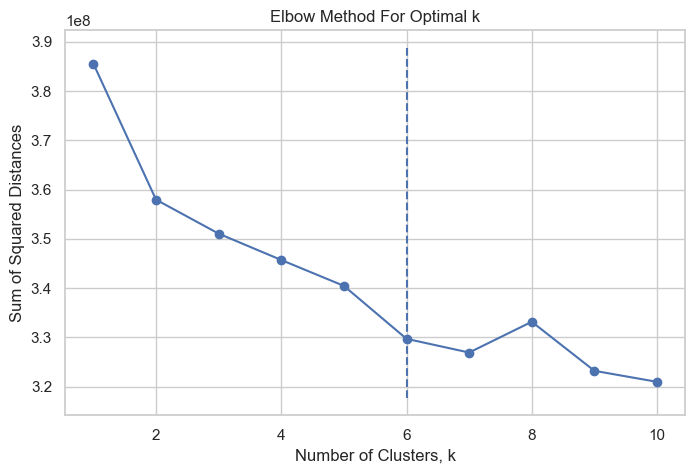

Optimal number of clusters: 6


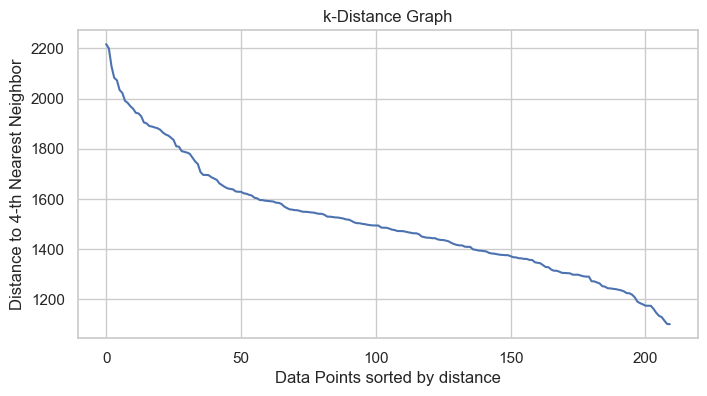

Recommended eps: 1545.83251953125


In [50]:
class Clustering:
    def __init__(self, features):
        self.features = np.array(features)

    def apply_kmeans(self, n_clusters=5, random_state=42):
        self.kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
        self.kmeans.fit(self.features)
        return self.kmeans.labels_

    def apply_dbscan(self, eps=0.5, min_samples=5):
        self.dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        self.dbscan.fit(self.features)
        return self.dbscan.labels_
    
    def find_optimal_k(self, max_k=10):
        sse = []
        k_values = range(1, max_k + 1)
        for k in k_values:
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(self.features)
            sse.append(kmeans.inertia_)
        return k_values, sse

    def plot_and_find_elbow(self, max_k=10):
        k_values, sse = self.find_optimal_k(max_k)
        plt.figure(figsize=(8, 5))
        plt.plot(k_values, sse, '-o')
        plt.xlabel('Number of Clusters, k')
        plt.ylabel('Sum of Squared Distances')
        plt.title('Elbow Method For Optimal k')
        plt.grid(True)

        kneelocator = KneeLocator(k_values, sse, curve='convex', direction='decreasing')
        plt.vlines(kneelocator.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
        plt.show()
        return kneelocator.knee
    
    def plot_k_distance(self, k=4):
        neigh = NearestNeighbors(n_neighbors=k)
        neigh.fit(self.features)
        distances, indices = neigh.kneighbors(self.features)
        
        k_dist = distances[:, k-1]
        k_dist = np.sort(k_dist)[::-1]

        plt.figure(figsize=(8, 4))
        plt.plot(k_dist)
        plt.title('k-Distance Graph')
        plt.xlabel('Data Points sorted by distance')
        plt.ylabel(f'Distance to {k}-th Nearest Neighbor')
        plt.grid(True)
        plt.show()

    def recommend_params(self, k=4):
        neigh = NearestNeighbors(n_neighbors=k)
        neigh.fit(self.features)
        distances, indices = neigh.kneighbors(self.features)
        
        k_dist = distances[:, k-1]
        k_dist = np.sort(k_dist)[::-1]

        gaps = np.diff(k_dist)
        eps = k_dist[np.argmax(gaps)]

        min_samples = int(np.log10(len(self.features)) * self.features.shape[1])
        return eps, min_samples

clustering = Clustering(features)

kmeans_labelss = clustering.apply_kmeans(n_clusters=6)
print("K-Means labels:", kmeans_labelss)

dbscan_labelss = clustering.apply_dbscan(eps=1545, min_samples=6)
print("DBSCAN labels:", dbscan_labelss)

optimal_k = clustering.plot_and_find_elbow(max_k=10)
print("Optimal number of clusters:", optimal_k)

clustering.plot_k_distance(k=4)
eps, min_samples = clustering.recommend_params(k=6)
print(f"Recommended eps: {eps}")

#### <p align="justify"><font size="5" color="#d62b5b">7. Research PCA and briefly explain how it works.</font></p>

<p align="justify">
<b>Principal Component Analysis (PCA)</b> is a statistical technique used for dimensionality reduction while preserving as much variance as possible. It's particularly useful in processing data with a large number of dimensions (features) by transforming it into a smaller number of dimensions (principal components) that still capture most of the variability in the data.
</p>

<p align="justify">
<b>How PCA Works:</b>
</p>

- <b>Standardization:</b> The process typically begins with standardizing the data. This involves mean-centering and scaling so that each feature has a variance of one. This step ensures that all features contribute equally to the analysis.
  
- <b>Covariance Matrix Computation:</b> PCA computes the covariance matrix of the data, which provides insight into how variables vary from the mean with respect to one another.

- <b>Eigendecomposition:</b> The next step is calculating the eigenvectors and eigenvalues of the covariance matrix. Eigenvectors represent the directions of maximum variance in the data, while eigenvalues indicate the magnitude of these directions.

- <b>Component Selection:</b> The eigenvectors are then sorted by the eigenvalues in descending order to prioritize the most significant directions. The top 'k' eigenvectors are selected, where 'k' is the desired number of principal components.

- <b>Projection:</b> Finally, the original data is projected onto these top eigenvectors. This results in a new set of dimensions called the principal components, which are orthogonal to each other and represent the directions of maximum variance in the data.
</p>

In [51]:
label_file_path = '/Users/kourosh/Codes/Jupyter/AI/CA3/flower_images/flower_labels.csv'

labels_df = pd.read_csv(label_file_path)

labels_df.sort_values('file', inplace=True)

true_labels = labels_df['label'].values

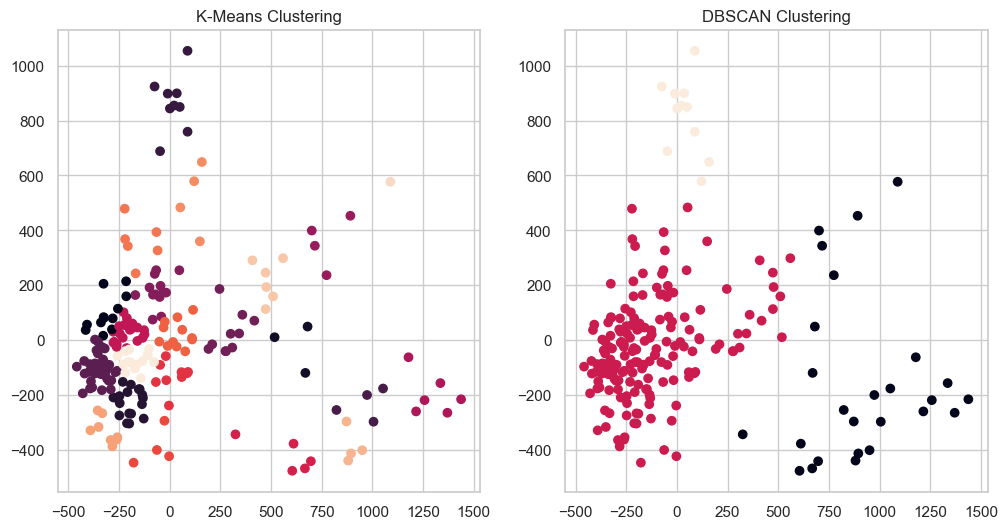

In [52]:
class Clustering:
    def __init__(self, features, labels, n_components=2):
        self.pca = PCA(n_components=n_components)
        self.features_reduced = self.pca.fit_transform(features)
        self.labels = labels

    def evaluate_clusters(self, cluster_labels):
        silhouette = silhouette_score(self.features_reduced, cluster_labels)
        homogeneity = homogeneity_score(self.labels, cluster_labels)
        return silhouette, homogeneity

    def apply_kmeans(self, n_clusters):
        self.kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        return self.kmeans.fit_predict(self.features_reduced)

    def apply_dbscan(self, eps, min_samples=6):
        self.dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        return self.dbscan.fit_predict(self.features_reduced)

clustering = Clustering(features, true_labels, n_components=2)
kmeans_labels = clustering.apply_kmeans(n_clusters=22)
dbscan_labels = clustering.apply_dbscan(eps=184, min_samples=8)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(clustering.features_reduced[:, 0], clustering.features_reduced[:, 1], c=kmeans_labels)
plt.title("K-Means Clustering")
plt.subplot(122)
plt.scatter(clustering.features_reduced[:, 0], clustering.features_reduced[:, 1], c=dbscan_labels)
plt.title("DBSCAN Clustering")
plt.show()

#### <p align="justify"><font size="5" color="#d62b5b">8. Explain how the silhouette and homogeneity metrics are calculated</font></p>

<p align="justify">
<b>Silhouette Score:</b> The Silhouette Score is a metric used to calculate the effectiveness of a clustering algorithm. It measures how similar an object is to its own cluster compared to other clusters. The score for each sample is calculated with the following formula:
</p>

$$\text{{silhouette\_score}} = \frac{{b - a}}{{\max(a, b)}}$$

<p align="justify">
Where:
</p>

- <b>a:</b> The mean distance between a sample and all other points in the same cluster.
- <b>b:</b> The smallest mean distance between the sample and all points in any other cluster, which the sample is not a part of.

<p align="justify">
The overall Silhouette Score is the mean of these values for all samples, indicating how well each object lies within its cluster.
</p>

<p align="justify">
<b>Homogeneity Score:</b> This metric assesses if each cluster contains only members of a single class. The formula used for the Homogeneity Score is:
</p>

$$H = \frac{1}{N} \sum \left(\frac{{\max(\text{{class\_count}})}}{{N_{\text{{cluster}}}}}\right)$$

<p align="justify">
where:
</p>

- <b>N:</b> Total number of samples.
- <b>N_cluster:</b> Number of samples in the cluster.
- <b>max(class_count):</b> The count of the most frequent class label within the cluster.

<p align="justify">
The score is calculated by taking the sum of the ratio of the maximum count of any class in a cluster to the number of samples in that cluster, averaged over all clusters.
</p>

In [53]:
kmeans_silhouette, kmeans_homogeneity = clustering.evaluate_clusters(kmeans_labels)
dbscan_silhouette, dbscan_homogeneity = clustering.evaluate_clusters(dbscan_labels)

print("K-Means Silhouette Score:", kmeans_silhouette)
print("K-Means Homogeneity Score:", kmeans_homogeneity)
print("DBSCAN Silhouette Score:", dbscan_silhouette)
print("DBSCAN Homogeneity Score:", dbscan_homogeneity)

K-Means Silhouette Score: 0.37701772098851905
K-Means Homogeneity Score: 0.5349329978492099
DBSCAN Silhouette Score: 0.5809985361647401
DBSCAN Homogeneity Score: 0.19412297358413172


#### <p align="justify"><font size="5" color="#d62b5b">10. Suggest strategies to improve the performance of models.</font></p>

<p align="justify">
Improving the performance of clustering models can involve various strategies, focusing on preprocessing data, tuning hyperparameters, feature selection, and exploring different clustering algorithms. Below are some specific strategies to consider:
</p>

### Data Preprocessing:
- **Normalization/Standardization:** Ensure that features are on a similar scale before clustering. This helps prevent attributes with larger scales from dominating the distance calculations used in clustering algorithms.

- **Handling Outliers:** Outliers can skew the results of clustering algorithms, especially those sensitive to outliers, such as K-Means. Identify and handle outliers appropriately, e.g., through removal or using robust scaling techniques.

- **Noise Reduction:** If the dataset contains a lot of noise, consider techniques like smoothing, which can help clarify the clusters.

### Feature Engineering:
- **Feature Selection:** Reduce dimensionality by selecting relevant features to decrease noise and improve clustering performance. Employ techniques such as backward elimination, recursive feature elimination, or using model-based importance to identify significant features.

- **Feature Extraction:** Techniques like PCA (Principal Component Analysis) or t-SNE (for visualization) can reduce dimensions while preserving important variances, potentially revealing inherent clustering patterns more effectively.

### Algorithm Parameter Tuning:
- **K-Means:** Experiment with the number of clusters (k), initialization techniques, and the number of initialization steps. Tools like the elbow method, silhouette analysis, or more sophisticated methods like gap statistics can help determine an optimal k.

- **DBSCAN:** Tuning the eps (epsilon) and min_samples parameters, which define the neighborhood size and the minimum number of points to form a dense region, respectively, can drastically affect the clusters formed.

### Algorithm Choice:
- **Algorithm Specifics:** Depending on the data distribution, some clustering algorithms might be inherently better suited than others. For instance, hierarchical clustering might be preferable for nested data, while density-based methods like DBSCAN are excellent for data with clusters of varying density.
</p>

In [54]:
pca = PCA(n_components=2)
features_reduced = pca.fit_transform(features)

def find_optimal_k_homogeneity_silhouette(features, labels, k_range):
    best_k = None
    best_score = -1
    results = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(features)
        silhouette = silhouette_score(features, cluster_labels)
        homogeneity = homogeneity_score(labels, cluster_labels)

        combined_score = (silhouette + homogeneity) / 2
        results.append((k, silhouette, homogeneity, combined_score))

        if combined_score > best_score:
            best_k = k
            best_score = combined_score

    return best_k, best_score, results

k_range = range(2, 30)
best_k, best_combined_score, k_results = find_optimal_k_homogeneity_silhouette(features_reduced, true_labels, k_range)

print(best_k, best_combined_score)

def find_optimal_dbscan_params_homogeneity_silhouette(features, labels, eps_values, min_samples_values):
    best_params = None
    best_score = -1
    results = []

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            cluster_labels = dbscan.fit_predict(features)
            unique_labels = np.unique(cluster_labels)

            if len(unique_labels) > 1 and len(unique_labels) < len(features) / 2:
                silhouette = silhouette_score(features, cluster_labels)
                homogeneity = homogeneity_score(labels, cluster_labels)
                combined_score = (silhouette + homogeneity) / 2
                results.append((eps, min_samples, silhouette, homogeneity, combined_score))

                if combined_score > best_score:
                    best_params = (eps, min_samples)
                    best_score = combined_score

    return best_params, best_score, results

eps_values = range(10, 1000)
min_samples_values = range(2, 10)
best_params, best_combined_score, dbscan_results = find_optimal_dbscan_params_homogeneity_silhouette(features_reduced, true_labels, eps_values, min_samples_values)

print(best_params, best_combined_score)

22 0.45597165059781486
(184, 8) 0.3875597040890115


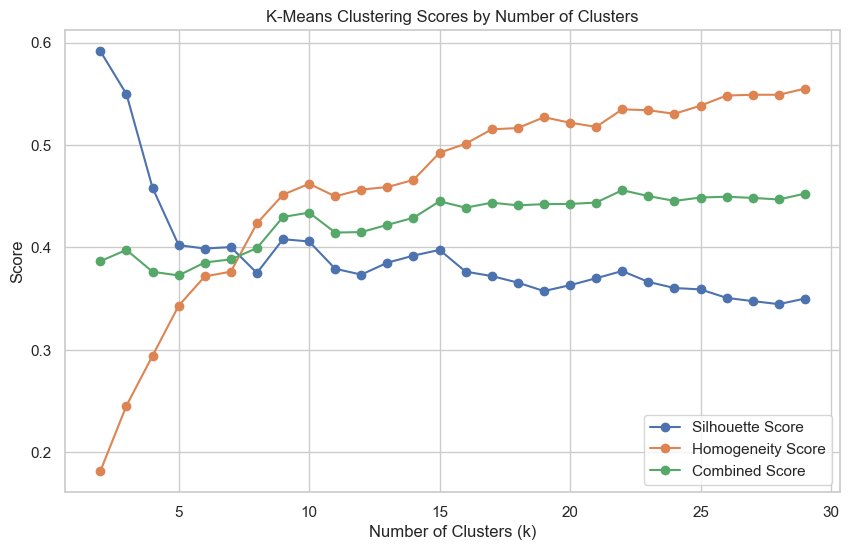

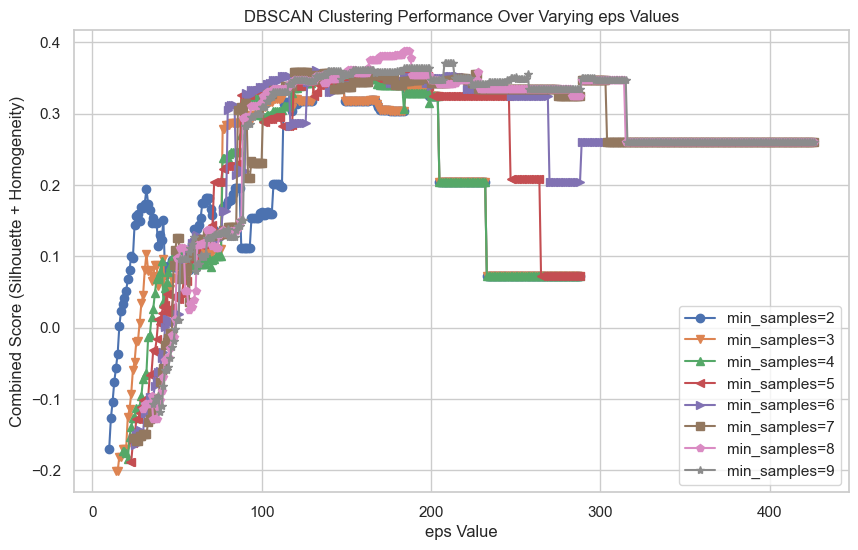

In [55]:
def plot_kmeans_results(results):
    k_values = [result[0] for result in results]
    silhouettes = [result[1] for result in results]
    homogeneities = [result[2] for result in results]
    combined_scores = [result[3] for result in results]

    plt.figure(figsize=(10, 6))
    plt.plot(k_values, silhouettes, label='Silhouette Score', marker='o')
    plt.plot(k_values, homogeneities, label='Homogeneity Score', marker='o')
    plt.plot(k_values, combined_scores, label='Combined Score', marker='o')
    plt.title('K-Means Clustering Scores by Number of Clusters')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_kmeans_results(k_results)

def plot_dbscan_results(results, eps_values, min_samples_values):
    scores = {min_samples: {'eps': [], 'silhouette': [], 'homogeneity': [], 'combined': []} for min_samples in min_samples_values}

    for eps, min_samples, silhouette, homogeneity, combined in results:
        scores[min_samples]['eps'].append(eps)
        scores[min_samples]['silhouette'].append(silhouette)
        scores[min_samples]['homogeneity'].append(homogeneity)
        scores[min_samples]['combined'].append(combined)

    plt.figure(figsize=(10, 6))
    markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'x']
    for idx, (min_samples, data) in enumerate(scores.items()):
        if data['eps']:
            plt.plot(data['eps'], data['combined'], label=f'min_samples={min_samples}', marker=markers[idx % len(markers)])

    plt.title('DBSCAN Clustering Performance Over Varying eps Values')
    plt.xlabel('eps Value')
    plt.ylabel('Combined Score (Silhouette + Homogeneity)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_dbscan_results(dbscan_results, list(eps_values), list(min_samples_values))